In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy.signal.windows import hann
import matplotlib as mpl
import os
import pickle

In [2]:
SaveFFTFig = True
SaveData = True

dpiN = 700
dark_plots = False
if dark_plots:
    dark='darkbg/'
    q = mpl.rc_params_from_file('matplotlibrc_dark')
else:
    dark = 'whitebg/'
    mpl.rcParams.update(mpl.rcParamsDefault)

SaveDir = '../Results/2021-11-16/Exp2/'+dark+'FFTFigs_16font/'
SaveDataDir = '../Results/2021-11-16/Exp2/'+'Pickles/'
if not os.path.exists(SaveDir):
    os.makedirs(SaveDir)
if not os.path.exists(SaveDataDir):
    os.makedirs(SaveDataDir)



In [3]:
if dark_plots:
    mpl.rcParams.update(q)
    %matplotlib inline
    mpl.rcParams.update({
                    #'legend.borderpad': 0.3,
                    #'legend.borderaxespad': 0.25,
#                     'legend.columnspacing': 0.6,
#                     'legend.handlelength': 0.7,
                    #'legend.handleheight': 0.4,
                    #'legend.handletextpad': 0.2,
#                     'legend.labelspacing': 0.45,
#                     'text.usetex': True,
                    'font.size':14,
                    })
else:
    # mpl.rcParams.update(mpl.rcParamsDefault)
    %matplotlib inline
    font = {
       'weight' : 'normal',
       'size'   : 16,
       'family': 'Times New Roman'}
    plt.rc('font', **font)
#     mpl.rcParams.update({'font.family':'serif'})
    # plt.rcParams['mathtext.default']='regular'

# Load data

## Experiment 2

In [4]:
f_sample = 500
sampling_factor = 10000

In [5]:
Exp2_data_file = '../Data/Exp2_AxionWeel000.0500.flt.csv'
Exp2_data = np.loadtxt(Exp2_data_file,delimiter= '\t')
Exp2_time = Exp2_data[:,0]
Exp2_AW_Z =  - Exp2_data[:,1] #(-AW-Z)
Exp2_AW_Y = -  Exp2_data[:,2] #(-AW-Y) 
Exp2_AV_X = + Exp2_data[:,3] #(+AV-Z)
Exp2_AV_Y = - Exp2_data[:,4] #(-AV-Y)

In [6]:
## Full useable range

Exp2_Freq       = [0.1,0.5,  1,  3,  5]
Exp2_Start_Time = [ 20,150,280,365,440]
Exp2_Stop_Time  = [ 140,260,334,427,500]

In [7]:
Exp2_data_cut_full = {}

Exp2_data_cut_full['time']={}

Exp2_data_cut_full['AW']={}
Exp2_data_cut_full['AW']['Z']={}
Exp2_data_cut_full['AW']['Y']={}
Exp2_data_cut_full['AV']={}
Exp2_data_cut_full['AV']['X']={}
Exp2_data_cut_full['AV']['Y']={}

In [8]:
Exp2_FFT = {}
Exp2_FFT['frequency'] = {}
Exp2_FFT['AW'] = {}
Exp2_FFT['AW']['Z'] = {}
Exp2_FFT['AW']['Y'] = {}
Exp2_FFT['AV'] = {}
Exp2_FFT['AV']['X'] = {}
Exp2_FFT['AV']['Y'] = {}

Exp2_FFT_amp = {}
Exp2_FFT_amp['AW'] = {}
Exp2_FFT_amp['AV'] = {}
Exp2_FFT_amp['AW']['Z'] = {}
Exp2_FFT_amp['AW']['Y'] = {}
Exp2_FFT_amp['AV']['Y'] = {}
Exp2_FFT_amp['AV']['X'] = {}

Exp2_FFT_amp_table = {}
Exp2_FFT_amp_table['frequency  '] = []
Exp2_FFT_amp_table['AW Z       '] = []
Exp2_FFT_amp_table['AW Y       '] = []
Exp2_FFT_amp_table['AV Y       '] = []
Exp2_FFT_amp_table['AV X       '] = []

In [9]:
last_time = 0
for i_freq in range(len(Exp2_Freq)):
    freq = Exp2_Freq[i_freq]
    f_new_sample = f_sample
    n_skips = int(np.ceil(f_sample/f_new_sample))
    cutbool = (Exp2_time>Exp2_Start_Time[i_freq]) & (Exp2_time<Exp2_Stop_Time[i_freq])
    Time_i = Exp2_time[cutbool] - Exp2_Start_Time[i_freq] # reset all clocks to zero
    Theta_i = 360 * freq * Time_i # degrees
    AWZ_i = Exp2_AW_Z[cutbool]
    AWY_i = Exp2_AW_Y[cutbool]
    AVX_i = Exp2_AV_X[cutbool]
    AVY_i = Exp2_AV_Y[cutbool]
    
    new_indices = np.arange(0,len(Time_i),n_skips)
    Exp2_data_cut_full['time'][freq]  = Time_i[new_indices] + last_time
    last_time = max(Exp2_data_cut_full['time'][freq])
    Exp2_data_cut_full['AW']['Z'][freq]     = AWZ_i[new_indices]
    Exp2_data_cut_full['AW']['Y'][freq]     = AWY_i[new_indices]
    Exp2_data_cut_full['AV']['X'][freq]     = AVX_i[new_indices]
    Exp2_data_cut_full['AV']['Y'][freq]     = AVY_i[new_indices]


In [10]:
for  ii in range(len(Exp2_Freq)):
    key           = Exp2_Freq[ii]

    # FFT
    TimeArrayLength = len(Exp2_data_cut_full['time'][key])
    Exp2_FFT['AW']['Z'][key] = (4*fft.rfft(Exp2_data_cut_full['AW']['Z'][key]*hann(TimeArrayLength),norm = "forward"))
    Exp2_FFT['AW']['Y'][key] = (4*fft.rfft(Exp2_data_cut_full['AW']['Y'][key]*hann(TimeArrayLength),norm = "forward"))
    Exp2_FFT['AV']['X'][key] = (4*fft.rfft(Exp2_data_cut_full['AV']['X'][key]*hann(TimeArrayLength),norm = "forward"))
    Exp2_FFT['AV']['Y'][key] = (4*fft.rfft(Exp2_data_cut_full['AV']['Y'][key]*hann(TimeArrayLength),norm = "forward"))
    Exp2_FFT['frequency'][key]          = fft.rfftfreq(n = TimeArrayLength,d=1/f_sample)

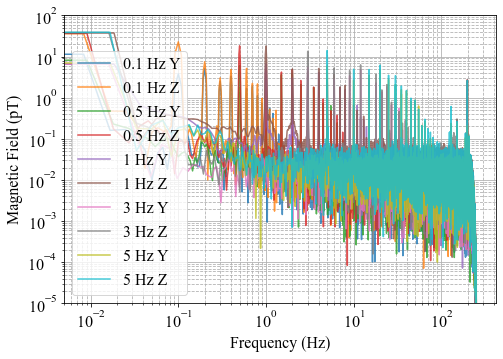

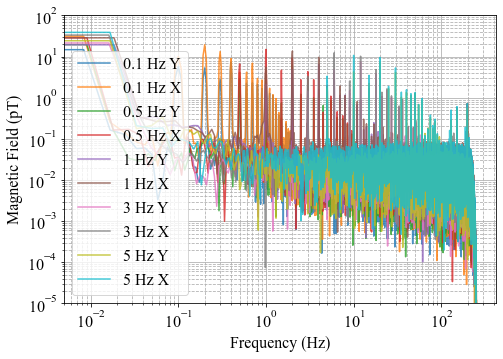

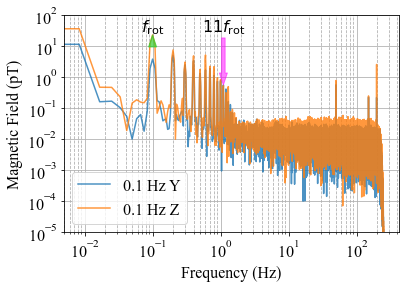

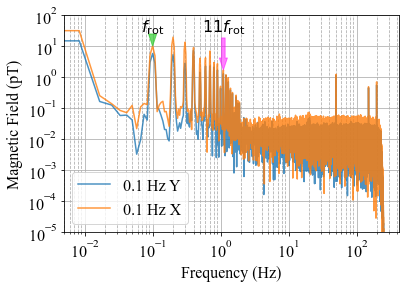

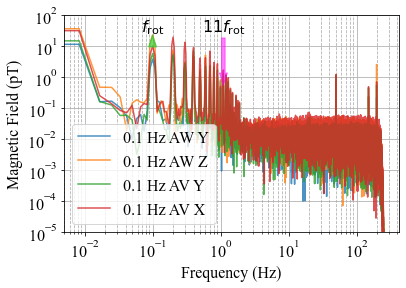

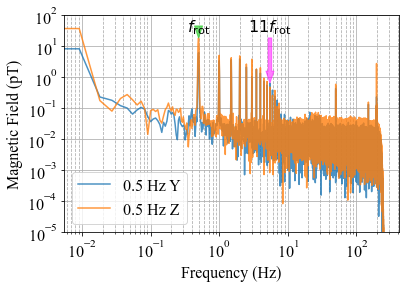

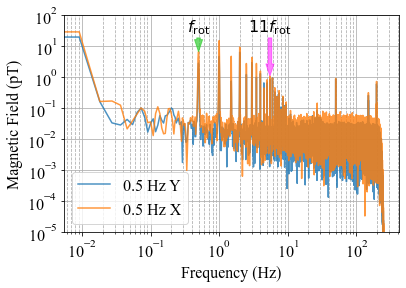

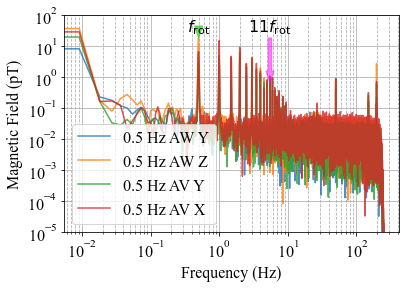

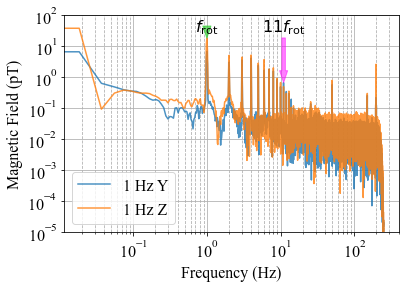

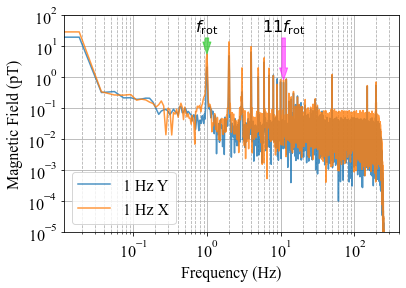

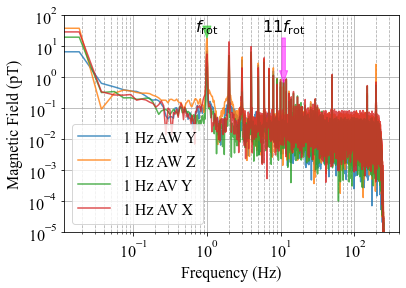

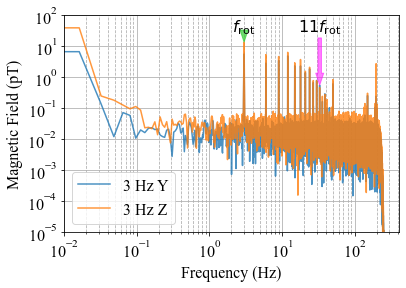

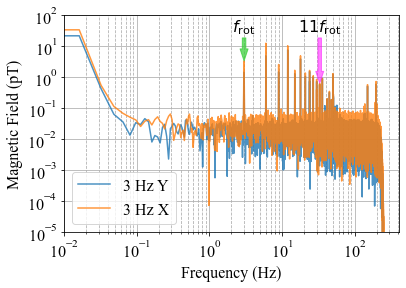

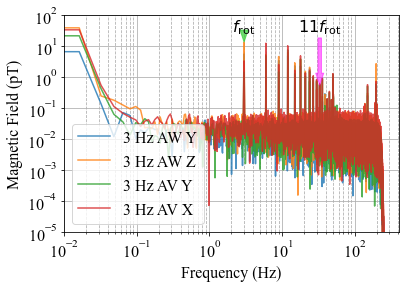

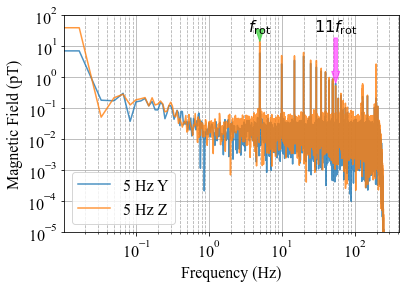

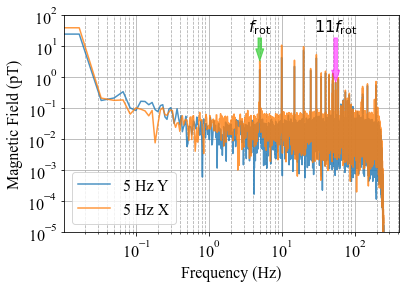

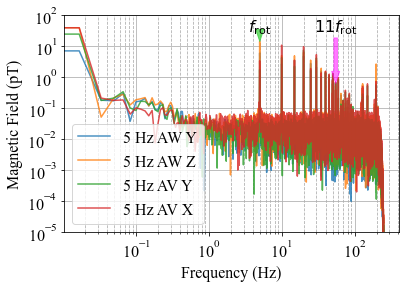

In [11]:
# nu = 5
# print(Exp1_Time_cut[nu].shape)
# print(Exp1_Freq_FFT[nu].shape)
# print(Exp1_X_FFT[nu].shape)
# plt.figure(figsize = (12,8))
bigplt_AW = plt.figure()
bigax_AW = bigplt_AW.add_axes([0, 0, 1, 1])
bigplt_AV = plt.figure()
bigax_AV = bigplt_AV.add_axes([0, 0, 1, 1])

for nu in Exp2_Freq:
#     Bmax_AW = max([max(abs(Exp2_FFT['AW']['Y'][nu])),max(abs(Exp2_FFT['AW']['Z'][nu]))])
#     Bmax_AV = max([max(abs(Exp2_FFT['AV']['Y'][nu])),max(abs(Exp2_FFT['AV']['Z'][nu]))])
    Bmax_AW = 1e2
    Bmax_AV = 1e2
#     indnu = np.argmin(np.abs(Exp2_FFT['frequency'][nu]-nu))
#     print(indnu)
    indnu = (np.abs(Exp2_FFT['frequency'][nu]-nu)<0.3*nu)
    ind11nu = (np.abs(Exp2_FFT['frequency'][nu]-11*nu)<0.3*nu)
    
    Exp2_FFT_amp_table['frequency  '].append(nu)

    Exp2_FFT_amp['AW']['Z'][nu]= abs(Exp2_FFT['AW']['Z'][nu][indnu]).max()
    Exp2_FFT_amp_table['AW Z       '].append(Exp2_FFT_amp['AW']['Z'][nu])
    Exp2_FFT_amp['AW']['Y'][nu]= abs(Exp2_FFT['AW']['Y'][nu][indnu]).max()
    Exp2_FFT_amp_table['AW Y       '].append(Exp2_FFT_amp['AW']['Y'][nu])
    Exp2_FFT_amp['AV']['Y'][nu]= abs(Exp2_FFT['AV']['Y'][nu][indnu]).max()
    Exp2_FFT_amp_table['AV Y       '].append(Exp2_FFT_amp['AV']['Y'][nu])
    Exp2_FFT_amp['AV']['X'][nu]= abs(Exp2_FFT['AV']['X'][nu][indnu]).max()
    Exp2_FFT_amp_table['AV X       '].append(Exp2_FFT_amp['AV']['X'][nu])
    
    Exp2_FFT_amp_table['frequency  '].append(11*nu)    
    
    Exp2_FFT_amp['AW']['Z'][11*nu]= abs(Exp2_FFT['AW']['Z'][nu][ind11nu]).max()
    Exp2_FFT_amp_table['AW Z       '].append(Exp2_FFT_amp['AW']['Z'][11*nu])
    Exp2_FFT_amp['AW']['Y'][11*nu]= abs(Exp2_FFT['AW']['Y'][nu][ind11nu]).max()
    Exp2_FFT_amp_table['AW Y       '].append(Exp2_FFT_amp['AW']['Y'][11*nu])
    Exp2_FFT_amp['AV']['Y'][11*nu]= abs(Exp2_FFT['AV']['Y'][nu][ind11nu]).max()
    Exp2_FFT_amp_table['AV Y       '].append(Exp2_FFT_amp['AV']['Y'][11*nu])
    Exp2_FFT_amp['AV']['X'][11*nu]= abs(Exp2_FFT['AV']['X'][nu][ind11nu]).max()
    Exp2_FFT_amp_table['AV X       '].append(Exp2_FFT_amp['AV']['X'][11*nu])
    
    Bmaxatnu_AW = max([Exp2_FFT_amp['AW']['Y'][nu],Exp2_FFT_amp['AW']['Z'][nu]])
    Bmaxatnu_AV = max([Exp2_FFT_amp['AV']['Y'][nu],Exp2_FFT_amp['AV']['X'][nu]])
    Bmaxat11nu_AW = max([Exp2_FFT_amp['AW']['Y'][11*nu],Exp2_FFT_amp['AW']['Z'][11*nu]])
    Bmaxat11nu_AV = max([Exp2_FFT_amp['AV']['Y'][11*nu],Exp2_FFT_amp['AV']['X'][11*nu]])
    

    figloop = plt.figure()
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Y'][nu]), label = str(nu)+' Hz Y',figure=figloop,alpha = 0.8)
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Z'][nu]), label = str(nu)+' Hz Z',figure=figloop,alpha = 0.8)
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnetic Field (pT)')
    plt.annotate('$f_\mathrm{rot}$',xy = (nu,Bmaxatnu_AW),xytext=(nu,0.3*Bmax_AW),\
                 arrowprops=dict(color='limegreen',alpha=0.7,width = 3.5,headwidth=8, shrink=0.),\
                horizontalalignment='center')
    plt.annotate('$11f_\mathrm{rot}$',xy = (11*nu,Bmaxat11nu_AW),xytext=(11*nu,0.3*Bmax_AW),\
                 arrowprops=dict(color='fuchsia',alpha=0.5,width = 3.5,headwidth=8,shrink=0.),\
                horizontalalignment='center')
    plt.legend(loc='lower left')
    plt.ylim(1e-5,Bmax_AW)
    ax = plt.gca()
    ax.yaxis.get_major_locator().numticks = 9
    plt.grid()
    plt.grid(which = 'minor',linestyle = '--')
    if SaveFFTFig:
        plt.savefig(SaveDir+'Exp2_AW_'+str(nu)+'Hz_FFT.png',bbox_inches = 'tight',dpi = dpiN)

    figloop = plt.figure()
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['Y'][nu]), label = str(nu)+' Hz Y',figure=figloop,alpha = 0.8)
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['X'][nu]), label = str(nu)+' Hz X',figure=figloop,alpha = 0.8)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnetic Field (pT)')
    plt.annotate('$f_\mathrm{rot}$',xy = (nu,Bmaxatnu_AV),xytext=(nu,0.3*Bmax_AV),\
                 arrowprops=dict(color='limegreen',alpha=0.7,width = 3.5,headwidth=8, shrink=0.),\
                horizontalalignment='center')
    plt.annotate('$11f_\mathrm{rot}$',xy = (11*nu,Bmaxat11nu_AV),xytext=(11*nu,0.3*Bmax_AV),\
                 arrowprops=dict(color='fuchsia',alpha=0.5,width = 3.5,headwidth=8,shrink=0.),\
                horizontalalignment='center')
    plt.legend(loc='lower left')
    plt.ylim(1e-5,Bmax_AV)
    ax = plt.gca()
    ax.yaxis.get_major_locator().numticks = 9
    plt.grid()
    plt.grid(which = 'minor',linestyle = '--')
    
    if SaveFFTFig:
        plt.savefig(SaveDir+'Exp2_AV_'+str(nu)+'Hz_FFT.png',bbox_inches = 'tight',dpi = dpiN)
 
    figloop = plt.figure()
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Y'][nu]), label = str(nu)+' Hz AW Y',figure=figloop,alpha = 0.8)
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Z'][nu]), label = str(nu)+' Hz AW Z',figure=figloop,alpha = 0.8)
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['Y'][nu]), label = str(nu)+' Hz AV Y',figure=figloop,alpha = 0.8)
    plt.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['X'][nu]), label = str(nu)+' Hz AV X',figure=figloop,alpha = 0.8)
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnetic Field (pT)')
    plt.annotate('$f_\mathrm{rot}$',xy = (nu,Bmaxatnu_AW),xytext=(nu,0.3*Bmax_AW),\
                 arrowprops=dict(color='limegreen',alpha=0.7,width = 3.5,headwidth=8, shrink=0.),\
                horizontalalignment='center')
    plt.annotate('$11f_\mathrm{rot}$',xy = (11*nu,Bmaxat11nu_AW),xytext=(11*nu,0.3*Bmax_AW),\
                 arrowprops=dict(color='fuchsia',alpha=0.5,width = 3.5,headwidth=8,shrink=0.),\
                horizontalalignment='center')
    plt.legend(loc='lower left')
    plt.ylim(1e-5,max(Bmax_AW,Bmax_AV))
    ax = plt.gca()
    ax.yaxis.get_major_locator().numticks = 9
    plt.grid()
    plt.grid(which = 'minor',linestyle = '--')
    if SaveFFTFig:
        plt.savefig(SaveDir+'Exp2_'+str(nu)+'Hz_FFT.png',bbox_inches = 'tight',dpi = dpiN)

    bigax_AW.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Y'][nu]), label = str(nu)+' Hz Y',figure=bigplt_AW,alpha = 0.8)
    bigax_AW.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AW']['Z'][nu]), label = str(nu)+' Hz Z',figure=bigplt_AW,alpha = 0.8)
    bigax_AV.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['Y'][nu]), label = str(nu)+' Hz Y',figure=bigplt_AV,alpha = 0.8)
    bigax_AV.loglog(Exp2_FFT['frequency'][nu],abs(Exp2_FFT['AV']['X'][nu]), label = str(nu)+' Hz X',figure=bigplt_AV,alpha = 0.8)
    
    
bigax_AW.set_xlabel('Frequency (Hz)')
bigax_AW.set_ylabel('Magnetic Field (pT)')
bigax_AW.grid()
bigax_AW.grid(which = 'minor',linestyle = '--')
bigax_AW.legend(loc = 'lower left')
bigax_AW.set_ylim(1e-5,1e2)
if SaveFFTFig:
    bigplt_AW.savefig(SaveDir+'Exp2_AW_'+str('all')+'Hz_FFT.png',bbox_inches = 'tight',dpi = dpiN)

bigax_AV.set_xlabel('Frequency (Hz)')
bigax_AV.set_ylabel('Magnetic Field (pT)')
bigax_AV.grid()
bigax_AV.grid(which = 'minor',linestyle = '--')
bigax_AV.legend(loc = 'lower left')
bigax_AV.set_ylim(1e-5,1e2)
if SaveFFTFig:
    bigplt_AV.savefig(SaveDir+'Exp2_AV_'+str('all')+'Hz_FFT.png',bbox_inches = 'tight',dpi = dpiN)

In [12]:
for key in Exp2_FFT_amp_table :
    print(key, end =" ")
    rd = [round(a,1) for a in Exp2_FFT_amp_table[key]]
    print(rd)

frequency   [0.1, 1.1, 0.5, 5.5, 1, 11, 3, 33, 5, 55]
AW Z        [22.8, 0.5, 18.2, 0.5, 18.1, 0.5, 13.5, 0.5, 14.1, 0.5]
AW Y        [3.8, 0.6, 6.1, 0.6, 6.6, 0.7, 5.5, 0.6, 5.9, 0.6]
AV Y        [5.8, 1.3, 2.8, 0.9, 2.1, 0.7, 1.5, 0.6, 1.7, 0.7]
AV X        [10.0, 1.7, 6.6, 1.1, 5.5, 0.8, 3.3, 0.6, 3.3, 0.7]


# Save Data

In [13]:
CutDataFileName = SaveDataDir+'Exp2_cut_full_data.pk'
FFTDataFileName = SaveDataDir+'Exp2_FFT_data.pk'

In [14]:
if SaveData:
    with open(CutDataFileName,'wb') as file_obj:
        pickle.dump(Exp2_data_cut_full,file_obj)
    with open(FFTDataFileName,'wb') as file_obj:
        pickle.dump(Exp2_FFT,file_obj)